In [1]:
class MultiLayerNN:
    def __init__(self, hl_nodes = 2, out_nodes = 1, epochs = 10000, learning_rate = 0.01, hl_act_func_name = 'sigmoid', out_act_func_name = 'sigmoid', loss_func_name = 'mse'):
        self.hl_nodes = hl_nodes
        self.out_nodes = out_nodes
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.hl_act_func_name = hl_act_func_name
        self.hl_act_func = self.get_act_func(hl_act_func_name)
        self.out_act_func_name = out_act_func_name
        self.out_act_func = self.get_act_func(out_act_func_name)
        self.loss_func_name = loss_func_name
        self.loss_func = self.get_loss_func(loss_func_name)
        self.hl_weights, self.hl_biases, self.out_weights, self.out_biases = self.gen_w_b(hl_nodes, out_nodes)
        print('Model initiated...')
        print('Number of hidden layer nodes : ', self.hl_nodes)
        print('Number of output layer nodes : ', self.out_nodes)
        print('Epochs : ', self.epochs)
        print('Learning rate : ', self.learning_rate)
        print('Hidden layer activation function : ', self.hl_act_func_name)
        print('Output layer activation function : ', self.out_act_func_name)
        print('Loss function : ', self.loss_func_name)
        
    def gen_w_b(self, hl_nodes, out_nodes):
        hl_weights = np.random.uniform(-1, 1, (2, hl_nodes))
        hl_biases = np.random.uniform(-1, 1, (1, hl_nodes))
        out_weights = np.random.uniform(-1, 1, (out_nodes, hl_nodes))
        out_biases = np.random.uniform(-1, 1, (out_nodes, 1))

        return hl_weights, hl_biases, out_weights, out_biases
    
    def get_act_func(self, name):
        options = {
            'sigmoid': {'func': self.sigmoid, 'derivative': self.sigmoid_derivative}
        }
        
        return options[name]
    
    def get_loss_func(self, name):
        options = {
            'mse': {'func': self.mse, 'derivative': self.mse_derivative}
        }
        
        return options[name]
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    def mse(self, y_predicted, y_desired):
        return (1/len(y_desired))*np.sum(np.square(y_desired-y_predicted))
    
    def mse_derivative(self, y_predicted, y_desired):
        return (2/len(y_desired))*np.sum(y_predicted-y_desired)
    
    # this formula returns the same result by providing the output of the activation function
    def sigmoid_derivative(self, y_predicted):
        return y_predicted*(1-y_predicted)
    
    def fit(self, X, y):
        for i in range(self.epochs):
            # forward pass
            hidden_layer_sum = X.dot(self.hl_weights) + self.hl_biases
            hidden_layer_out = self.hl_act_func['func'](hidden_layer_sum) # sigmoid
            output_layer_sum = np.dot(hidden_layer_out, self.out_weights.T) + self.out_biases
            predicted_y = self.out_act_func['func'](output_layer_sum) #sigmoid
            loss = self.loss_func['func'](predicted_y, y) # mse

            print('Epoch: {} -------------------------\n\tloss = {}'.format(i, loss))
            print("hidden weights: ")
            print(self.hl_weights)
            print("hidden biases: ")
            print(self.hl_biases)
            print("output weights: ")
            print(self.out_weights)
            print("output biases: ")
            print(self.out_biases)
            
            print('---------------------------')
#             print('predicted', predicted_y)
#             print(self.loss_func['derivative'](predicted_y, y))
#             print(self.out_act_func['derivative'](predicted_y))
#             print(self.hl_act_func['derivative'](hidden_layer_out))


            # backward pass
            ## hidden layer
            dloss_dw_hl = X.T.dot(((self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)).dot(self.out_weights))*(self.hl_act_func['derivative'](hidden_layer_out)))
            dloss_dbias_hl = ((self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)).dot(self.out_weights))*self.hl_act_func['derivative'](hidden_layer_out)
            ## output layer
            dloss_dw_out = (self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)).T.dot(hidden_layer_out)
            dloss_dbias_out = self.loss_func['derivative'](predicted_y, y)*self.out_act_func['derivative'](predicted_y)

            print('------------------------------')
            print('grdient ==> ', dloss_dw_hl, np.sum(dloss_dbias_hl, axis=0, keepdims=True), dloss_dw_out, np.sum(dloss_dbias_out, axis=0, keepdims=True))
            
            # update
            self.hl_weights -= self.learning_rate*dloss_dw_hl
            self.hl_biases -= self.learning_rate*np.sum(dloss_dbias_hl, axis=0, keepdims=True)
            self.out_weights -= self.learning_rate*dloss_dw_out
            self.out_biases -= self.learning_rate*np.sum(dloss_dbias_out, axis=0, keepdims=True)
            
    def predict(self, X):
        hidden_layer_sum = X.dot(self.hl_weights) + self.hl_biases
        hidden_layer_out = self.hl_act_func['func'](hidden_layer_sum) # sigmoid
        output_layer_sum = np.dot(hidden_layer_out, self.out_weights.T) + self.out_biases
        predicted_y = self.out_act_func['func'](output_layer_sum) #sigmoid
        return predicted_y

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split

In [3]:
# dataset

rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:,0]>0, X[:,1]>0), dtype=int)

# data split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
# model

model = MultiLayerNN(4, 1)

Model initiated...
Number of hidden layer nodes :  4
Number of output layer nodes :  1
Epochs :  10000
Learning rate :  0.01
Hidden layer activation function :  sigmoid
Output layer activation function :  sigmoid
Loss function :  mse


In [5]:
# training

model.fit(X_train, y_train)

Epoch: 0 -------------------------
	loss = 51.184710708041536
hidden weights: 
[[0.10802552 0.6953996  0.52965241 0.15206976]
 [0.49392557 0.77076654 0.83829327 0.64001395]]
hidden biases: 
[[-0.97798641 -0.96600877 -0.78688469  0.13735967]]
output weights: 
[[-0.25098795  0.72378323  0.96261402 -0.0635001 ]]
output biases: 
[[-0.88544285]]
---------------------------
------------------------------
grdient ==>  [[ -0.93529976 -17.90094019 -10.775091    -1.224646  ]
 [  9.90258244 -29.22780986 -39.1460033   -0.33586286]] [[  49.3287903  -127.55907716 -181.52548944   14.62779193]] [[-287.61099646 -309.43689904 -341.92228402 -538.51416606]] [[-1017.75796776]]
Epoch: 1 -------------------------
	loss = 111.99979363708698
hidden weights: 
[[0.11737852 0.87440901 0.63740332 0.16431622]
 [0.39489975 1.06304464 1.2297533  0.64337258]]
hidden biases: 
[[-1.47127432  0.309582    1.02837021 -0.00891824]]
output weights: 
[[2.62512202 3.81815222 4.38183686 5.32164156]]
output biases: 
[[9.29213683

grdient ==>  [[-0.00569104 -0.00616563 -0.01449558 -0.02278187]
 [-0.01741364 -0.02829662 -0.04254723 -0.06598403]] [[0.00992947 0.01672332 0.02621405 0.0382031 ]] [[0.00420352 0.00532924 0.0081469  0.00945838]] [[0.04521175]]
Epoch: 33 -------------------------
	loss = 111.99977442586078
hidden weights: 
[[0.11913303 0.87631567 0.6418854  0.17137939]
 [0.40027031 1.07178238 1.24293714 0.66396287]]
hidden biases: 
[[-1.47433406  0.30442283  1.02026554 -0.02079726]]
output weights: 
[[2.6238263  3.81650635 4.37931245 5.31868804]]
output biases: 
[[9.27827853]]
---------------------------
------------------------------
grdient ==>  [[-0.00570506 -0.00617959 -0.01452845 -0.02282931]
 [-0.01745587 -0.02836293 -0.0426371  -0.06609235]] [[0.00995418 0.01676366 0.02627347 0.03827503]] [[0.00421389 0.00534172 0.00816418 0.00947358]] [[0.04534026]]
Epoch: 34 -------------------------
	loss = 111.99977378380673
hidden weights: 
[[0.11919008 0.87637747 0.64203068 0.17160768]
 [0.40044487 1.072066

 [-0.0188879  -0.03060766 -0.04566373 -0.06968795]] [[0.01079603 0.01813705 0.02828986 0.04068947]] [[0.00456721 0.00576629 0.00874995 0.00998277]] [[0.0497522]]
Epoch: 66 -------------------------
	loss = 111.99975174033767
hidden weights: 
[[0.12109318 0.87843218 0.64686106 0.17917335]
 [0.40626277 1.08150603 1.25749882 0.68635982]]
hidden biases: 
[[-1.47775512  0.29866859  1.01126868 -0.03382045]]
output weights: 
[[2.62237856 3.81467488 4.37652336 5.31547896]]
output biases: 
[[9.26260422]]
---------------------------
------------------------------
grdient ==>  [[-0.00620067 -0.00667388 -0.01568666 -0.02448794]
 [-0.0189353  -0.03068183 -0.04576323 -0.0698045 ]] [[0.01082404 0.0181827  0.02835666 0.04076861]] [[0.00457896 0.00578039 0.00876933 0.00999943]] [[0.04990003]]
Epoch: 67 -------------------------
	loss = 111.99975100170077
hidden weights: 
[[0.12115519 0.87849892 0.64701792 0.17941823]
 [0.40645212 1.08181285 1.25795645 0.68705786]]
hidden biases: 
[[-1.47786336  0.29848

[[2.62055159 3.81237407 4.37304813 5.31155745]]
output biases: 
[[9.24254132]]
---------------------------
------------------------------
grdient ==>  [[-0.00686189 -0.00733554 -0.01722129 -0.02664785]
 [-0.02086856 -0.03370058 -0.04978721 -0.07443643]] [[0.01197392 0.02005474 0.03108547 0.04395908]] [[0.00506136 0.00635851 0.00956039 0.01067026]] [[0.05602731]]
Epoch: 105 -------------------------
	loss = 111.99972038188564
hidden weights: 
[[0.12363702 0.88116057 0.65327066 0.18913566]
 [0.41401612 1.0940479  1.27611577 0.714474  ]]
hidden biases: 
[[-1.48219526  0.29122106  0.9996896  -0.05033072]]
output weights: 
[[2.62050098 3.81231048 4.37295253 5.31145075]]
output biases: 
[[9.24198105]]
---------------------------
------------------------------
grdient ==>  [[-0.00688078 -0.00735449 -0.01726497 -0.02670873]
 [-0.02092313 -0.0337856  -0.04989984 -0.07456391]] [[0.0120066  0.02010788 0.03116263 0.04404815]] [[0.00507507 0.00637491 0.00958274 0.01068896]] [[0.05620303]]
Epoch: 10

Epoch: 146 -------------------------
	loss = 111.99968081561435
hidden weights: 
[[0.12662305 0.88434165 0.66072945 0.20061206]
 [0.42306633 1.10863369 1.29754207 0.74612623]]
hidden biases: 
[[-1.48740196  0.28251537  0.98624483 -0.06915428]]
output weights: 
[[2.6183011  3.80955439 4.36883028 5.30690804]]
output biases: 
[[9.21739931]]
---------------------------
------------------------------
grdient ==>  [[-0.00773197 -0.00821094 -0.01922419 -0.02940806]
 [-0.02334556 -0.03754996 -0.05485115 -0.08006196]] [[0.01346911 0.02248333 0.03459662 0.04795525]] [[0.00568836 0.00710769 0.01057607 0.01150828]] [[0.06415579]]
Epoch: 147 -------------------------
	loss = 111.99967975157819
hidden weights: 
[[0.12670037 0.88442375 0.6609217  0.20090614]
 [0.42329978 1.10900919 1.29809058 0.74692685]]
hidden biases: 
[[-1.48753665  0.28229054  0.98589886 -0.06963383]]
output weights: 
[[2.61824422 3.80948331 4.36872452 5.30679296]]
output biases: 
[[9.21675775]]
---------------------------
------

grdient ==>  [[-0.00870544 -0.00919758 -0.02144537 -0.03239973]
 [-0.02603334 -0.04170448 -0.06024185 -0.08583949]] [[0.01511921 0.02515743 0.03843023 0.05220094]] [[0.00638008 0.00793184 0.01168292 0.01239693]] [[0.07332639]]
Epoch: 186 -------------------------
	loss = 111.99963389929405
hidden weights: 
[[0.12990468 0.88781716 0.66885066 0.21295873]
 [0.4329287  1.12446459 1.32053709 0.77928769]]
hidden biases: 
[[-1.49311046  0.27300188  0.97165946 -0.08916699]]
output weights: 
[[2.61589125 3.80655098 4.3643842  5.30213083]]
output biases: 
[[9.18996041]]
---------------------------
------------------------------
grdient ==>  [[-0.00873287 -0.0092255  -0.02150769 -0.0324827 ]
 [-0.02610789 -0.04181939 -0.06038994 -0.08599549]] [[0.01516539 0.02523218 0.03853695 0.05231759]] [[0.00639943 0.00795487 0.0117137  0.01242133]] [[0.07358589]]
Epoch: 187 -------------------------
	loss = 111.99963260158607
hidden weights: 
[[0.12999201 0.88790942 0.66906574 0.21328356]
 [0.43318978 1.1248

hidden biases: 
[[-1.49753925  0.26564161  0.96044843 -0.10427271]]
output weights: 
[[2.61402293 3.80423267 4.36098305 5.29855733]]
output biases: 
[[9.16832459]]
---------------------------
------------------------------
grdient ==>  [[-0.0095591  -0.01006943 -0.02337784 -0.03494987]
 [-0.02832386 -0.04522748 -0.0647597  -0.09054059]] [[0.01654797 0.02746862 0.04172004 0.05576262]] [[0.00697886 0.00864368 0.01263146 0.0131417 ]] [[0.08142699]]
Epoch: 215 -------------------------
	loss = 111.99959338579478
hidden weights: 
[[0.13255432 0.89061203 0.67535324 0.22272978]
 [0.44081535 1.13707757 1.33867348 0.80487725]]
hidden biases: 
[[-1.49770473  0.26536693  0.96003123 -0.10483033]]
output weights: 
[[2.61395314 3.80414624 4.36085673 5.29842592]]
output biases: 
[[9.16751032]]
---------------------------
------------------------------
grdient ==>  [[-0.00959083 -0.01010195 -0.0234494  -0.03504344]
 [-0.02840786 -0.04535638 -0.06492415 -0.09070956]] [[0.01660076 0.02755394 0.04184112 

[[-1.50384795  0.25518517  0.94462557 -0.12520224]]
output weights: 
[[2.61136328 3.80094615 4.35620421 5.29364759]]
output biases: 
[[9.13698473]]
---------------------------
------------------------------
grdient ==>  [[-0.01081283 -0.01136124 -0.02619264 -0.03858722]
 [-0.03158634 -0.05021937 -0.07108816 -0.09694657]] [[0.01861832 0.03081231 0.04644677 0.06077053]] [[0.00784638 0.00967306 0.01399282 0.01418854]] [[0.09341381]]
Epoch: 251 -------------------------
	loss = 111.99953341763155
hidden weights: 
[[0.13622037 0.89446823 0.68427471 0.23596747]
 [0.4516003  1.15426059 1.36313178 0.83863643]]
hidden biases: 
[[-1.50403413  0.25487704  0.9441611  -0.12580995]]
output weights: 
[[2.61128481 3.80084942 4.35606429 5.29350571]]
output biases: 
[[9.13605059]]
---------------------------
------------------------------
grdient ==>  [[-0.01085122 -0.01140101 -0.02627843 -0.03869677]
 [-0.03168448 -0.05036909 -0.07127675 -0.09713466]] [[0.01868123 0.03091384 0.04658975 0.06092024]] [[0

output weights: 
[[2.60931942 3.79843039 4.35257783 5.29000346]]
output biases: 
[[9.11247431]]
---------------------------
------------------------------
grdient ==>  [[-0.01183976 -0.01242927 -0.02847956 -0.04148294]
 [-0.03417776 -0.05416419 -0.07603622 -0.10183397]] [[0.02029187 0.03351177 0.05023857 0.06470994]] [[0.00854757 0.01050388 0.01508403 0.01501215]] [[0.10330655]]
Epoch: 276 -------------------------
	loss = 111.9994839094707
hidden weights: 
[[0.13905409 0.89744409 0.69111384 0.24598374]
 [0.45982765 1.1673193  1.38153673 0.86350021]]
hidden biases: 
[[-1.50890179  0.24683022  0.93206615 -0.14150596]]
output weights: 
[[2.60923394 3.79832536 4.35242699 5.28985334]]
output biases: 
[[9.11144125]]
---------------------------
------------------------------
grdient ==>  [[-0.01188393 -0.0124754  -0.02857758 -0.04160596]
 [-0.03428771 -0.0543312  -0.07624477 -0.10203792]] [[0.02036344 0.03362716 0.05040023 0.06487654]] [[0.00857756 0.01053939 0.01513054 0.01504699]] [[0.1037

------------------------------
grdient ==>  [[-0.01287364 -0.0135132  -0.03076653 -0.04433165]
 [-0.03672084 -0.05801935 -0.08083249 -0.10648727]] [[0.02195871 0.03619837 0.05399396 0.06855428]] [[0.00924595 0.01133066 0.01616422 0.01581625]] [[0.11333038]]
Epoch: 298 -------------------------
	loss = 111.99943373041899
hidden weights: 
[[0.14177529 0.90030046 0.69763722 0.25543201]
 [0.46763434 1.17967168 1.39880812 0.88643229]]
hidden biases: 
[[-1.51355406  0.23915448  0.92058961 -0.15617721]]
output weights: 
[[2.60727468 3.79592121 4.34898653 5.28645967]]
output biases: 
[[9.08758591]]
---------------------------
------------------------------
grdient ==>  [[-0.01292392 -0.01356612 -0.03087736 -0.0444686 ]
 [-0.03684292 -0.05820404 -0.08106137 -0.10670749]] [[0.02203933 0.03632828 0.05417512 0.06873844]] [[0.00927973 0.01137064 0.01621632 0.01585478]] [[0.11381938]]
Epoch: 299 -------------------------
	loss = 111.99943128212867
hidden weights: 
[[0.14190453 0.90043612 0.69794599 

[[2.60359918 3.79142773 4.34261439 5.2803202 ]]
output biases: 
[[9.04193293]]
---------------------------
------------------------------
grdient ==>  [[-0.01502073 -0.01579029 -0.03547168 -0.05006483]
 [-0.04181744 -0.06570261 -0.09029297 -0.11547129]] [[0.02537029 0.04169406 0.06162822 0.0762261 ]] [[0.01067547 0.01302203 0.01835915 0.01742248]] [[0.13434346]]
Epoch: 336 -------------------------
	loss = 111.99932849163437
hidden weights: 
[[0.14706976 0.90586127 0.71021231 0.27336   ]
 [0.48255104 1.20317214 1.43131751 0.92860748]]
hidden biases: 
[[-1.52253988  0.22436562  0.89863441 -0.1836779 ]]
output weights: 
[[2.60349242 3.79129751 4.34243079 5.28014597]]
output biases: 
[[9.0405895]]
---------------------------
------------------------------
grdient ==>  [[-0.01508456 -0.01585849 -0.0356107  -0.0502319 ]
 [-0.0419655  -0.06592504 -0.09056512 -0.11572652]] [[0.02547078 0.04185593 0.06185223 0.07644871]] [[0.01071759 0.01307185 0.01842354 0.01746913]] [[0.13497206]]
Epoch: 337

output biases: 
[[8.98118441]]
---------------------------
------------------------------
grdient ==>  [[-0.01802898 -0.01903379 -0.0419775  -0.05776065]
 [-0.04860987 -0.07586783 -0.10264915 -0.12691937]] [[0.03005817 0.04924701 0.07203786 0.08645011]] [[0.01264043 0.01534748 0.02135109 0.01956703]] [[0.16421117]]
Epoch: 377 -------------------------
	loss = 111.99917879687901
hidden weights: 
[[0.15383086 0.91298304 0.72606207 0.29544005]
 [0.50106926 1.23216767 1.47084396 0.97828196]]
hidden biases: 
[[-1.53388399  0.20575308  0.8712719  -0.21699615]]
output weights: 
[[2.59872054 3.78549116 4.3343014  5.27256965]]
output biases: 
[[8.9795423]]
---------------------------
------------------------------
grdient ==>  [[-0.01811378 -0.01912605 -0.04215961 -0.0579728 ]
 [-0.0487963  -0.07614581 -0.10298494 -0.12722704]] [[0.03018903 0.04945796 0.07232746 0.0867314 ]] [[0.01269529 0.01541245 0.02143432 0.0196261 ]] [[0.16506018]]
Epoch: 378 -------------------------
	loss = 111.999174539

hidden biases: 
[[-1.5470864   0.18415215  0.83985215 -0.25408804]]
output weights: 
[[2.59316988 3.77876615 4.3250124  5.26421492]]
output biases: 
[[8.90610574]]
---------------------------
------------------------------
grdient ==>  [[-0.02209767 -0.02350392 -0.05064606 -0.06769753]
 [-0.05729526 -0.08877283 -0.11814451 -0.14098045]] [[0.03627218 0.05927576 0.08575141 0.09962544]] [[0.01524674 0.01843777 0.02529238 0.02233746]] [[0.20536282]]
Epoch: 418 -------------------------
	loss = 111.99897233974939
hidden weights: 
[[0.16203274 0.92167384 0.74500318 0.32111609]
 [0.52274557 1.26587111 1.51605526 1.03316349]]
hidden biases: 
[[-1.54744912  0.1835594   0.83899463 -0.2550843 ]]
output weights: 
[[2.59301742 3.77858177 4.32475947 5.26399154]]
output biases: 
[[8.90405212]]
---------------------------
------------------------------
grdient ==>  [[-0.02221453 -0.02363355 -0.05089313 -0.06797642]
 [-0.05753766 -0.08913185 -0.1185732  -0.14136617]] [[0.03644896 0.05956148 0.08614065 

 [-0.06917327 -0.10631322 -0.13897692 -0.15959222]] [[0.0451329  0.07363183 0.1052312  0.11796028]] [[0.0189672  0.0228672  0.03089131 0.02620381]] [[0.26665831]]
Epoch: 460 -------------------------
	loss = 111.9986643799607
hidden weights: 
[[0.17250709 0.93287893 0.76878277 0.35234907]
 [0.54923189 1.30673604 1.56993565 1.09618931]]
hidden biases: 
[[-1.56447657  0.15576095  0.79903523 -0.30065163]]
output weights: 
[[2.58586106 3.76994256 4.31300315 5.25382478]]
output biases: 
[[8.80549408]]
---------------------------
------------------------------
grdient ==>  [[-0.02818468 -0.03033293 -0.06339952 -0.08185037]
 [-0.06950623 -0.10680373 -0.13955671 -0.16010719]] [[0.04538687 0.07404444 0.10578901 0.11848039]] [[0.01907391 0.0229946  0.03105164 0.02631365]] [[0.26845544]]
Epoch: 461 -------------------------
	loss = 111.99865534291052
hidden weights: 
[[0.17278893 0.93318226 0.76941676 0.35316757]
 [0.54992695 1.30780407 1.57133122 1.09779038]]
hidden biases: 
[[-1.56493043  0.155

------------------------------
grdient ==>  [[-0.03701689 -0.04046439 -0.08157803 -0.10139534]
 [-0.08609047 -0.13119389 -0.16825183 -0.18548207]] [[0.05838366 0.09524796 0.1343337  0.14483517]] [[0.02454046 0.02954824 0.03925618 0.0318878 ]] [[0.36298286]]
Epoch: 502 -------------------------
	loss = 111.9981793749783
hidden weights: 
[[0.18606398 0.94758338 0.79896026 0.39056278]
 [0.58169024 1.35639857 1.63421065 1.16844678]]
hidden biases: 
[[-1.5860759   0.12052947  0.74903269 -0.355573  ]]
output weights: 
[[2.57678337 3.75900787 4.29836013 5.24168229]]
output biases: 
[[8.67445553]]
---------------------------
------------------------------
grdient ==>  [[-0.03728816 -0.0407789  -0.08213164 -0.10198212]
 [-0.08658378 -0.13191872 -0.16910127 -0.18623088]] [[0.05878004 0.09589735 0.13520469 0.14563264]] [[0.02470735 0.02974913 0.03950651 0.03205669]] [[0.36593804]]
Epoch: 503 -------------------------
	loss = 111.9981644751506
hidden weights: 
[[0.18643686 0.94799117 0.79978157 0.

Epoch: 550 -------------------------
	loss = 111.9971411994233
hidden weights: 
[[0.20781009 0.97166463 0.84617314 0.44766639]
 [0.63003527 1.42968996 1.72702507 1.2680859 ]]
hidden biases: 
[[-1.61988291  0.06529131  0.67183094 -0.43665815]]
output weights: 
[[2.56256627 3.74187712 4.27586149 5.22392449]]
output biases: 
[[8.45603606]]
---------------------------
------------------------------
grdient ==>  [[-0.05585289 -0.06264134 -0.11956384 -0.14091214]
 [-0.11880293 -0.17928217 -0.22433096 -0.23480089]] [[0.08570106 0.14034033 0.19447514 0.19929888]] [[0.03606389 0.04351809 0.05653624 0.04344023]] [[0.57460082]]
Epoch: 551 -------------------------
	loss = 111.99710941417035
hidden weights: 
[[0.20836862 0.97229104 0.84736878 0.44907551]
 [0.6312233  1.43148278 1.72926838 1.27043391]]
hidden biases: 
[[-1.62073992  0.0638879   0.66988619 -0.43865113]]
output weights: 
[[2.56220563 3.74144194 4.27529613 5.22349008]]
output biases: 
[[8.45029005]]
---------------------------
-------

------------------------------
grdient ==>  [[-0.09790606 -0.11364458 -0.20258728 -0.22453092]
 [-0.18541682 -0.27769132 -0.33790501 -0.3344558 ]] [[0.14622285 0.24199906 0.32840136 0.31819946]] [[0.06172061 0.07510503 0.09497179 0.06871275]] [[1.08335227]]
Epoch: 597 -------------------------
	loss = 111.99451273202108
hidden weights: 
[[0.2423039  1.01104735 0.91870271 0.53044007]
 [0.69916511 1.53356327 1.85514367 1.39835135]]
hidden biases: 
[[-1.67203253 -0.02053581  0.55418687 -0.55370962]]
output weights: 
[[2.54058984 3.71525419 4.24175642 5.19853919]]
output biases: 
[[8.08784202]]
---------------------------
------------------------------
grdient ==>  [[-0.09945843 -0.1155519  -0.20562643 -0.22755258]
 [-0.18777268 -0.28118361 -0.34191227 -0.3379693 ]] [[0.14845551 0.24578092 0.33335256 0.32255878]] [[0.06266975 0.07628175 0.0963917  0.06963977]] [[1.10287684]]
Epoch: 598 -------------------------
	loss = 111.99441240152204
hidden weights: 
[[0.24329848 1.01220287 0.92075898 

------------------------------
grdient ==>  [[-0.14449486 -0.17135662 -0.29335706 -0.31408636]
 [-0.25408612 -0.3797166  -0.45442327 -0.4365484 ]] [[0.21327832 0.35619762 0.47722146 0.44855628]] [[0.09029037 0.11067333 0.13762758 0.09643549]] [[1.68659522]]
Epoch: 618 -------------------------
	loss = 111.99139004588348
hidden weights: 
[[0.26738531 1.04049798 0.97006875 0.58631862]
 [0.74483336 1.6018711  1.93753493 1.47860546]]
hidden biases: 
[[-1.70924464 -0.08241455  0.47078801 -0.63319703]]
output weights: 
[[2.52485899 3.69603891 4.21767426 5.18141599]]
output biases: 
[[7.80237885]]
---------------------------
------------------------------
grdient ==>  [[-0.14778989 -0.17546823 -0.29974955 -0.32035   ]
 [-0.25881013 -0.38674922 -0.46241596 -0.44354644]] [[0.21802549 0.3643209  0.48776104 0.45774586]] [[0.09231736 0.11320586 0.14064703 0.09838981]] [[1.73044678]]
Epoch: 619 -------------------------
	loss = 111.99116121765644
hidden weights: 
[[0.26886321 1.04225267 0.97306625 

------------------------------
grdient ==>  [[-0.52987738 -0.66160173 -1.02960537 -1.0213625 ]
 [-0.75404158 -1.12589614 -1.285003   -1.16162821]] [[0.77107587 1.32194321 1.70968575 1.50947529]] [[0.33060933 0.4130371  0.49041381 0.32193895]] [[7.36270784]]
Epoch: 651 -------------------------
	loss = 111.95971109701841
hidden weights: 
[[0.35463719 1.14707114 1.14292926 0.7635229 ]
 [0.88196782 1.80667774 2.17670987 1.70063345]]
hidden biases: 
[[-1.8367996  -0.29858645  0.18666254 -0.89070393]]
output weights: 
[[2.47051511 3.62868958 4.1360008  5.12631618]]
output biases: 
[[6.68425455]]
---------------------------
------------------------------
grdient ==>  [[-0.57641165 -0.72132326 -1.1173829  -1.10476333]
 [-0.81035271 -1.20987539 -1.37699204 -1.24178625]] [[0.8386391  1.43951673 1.85804539 1.63632409]] [[0.3599062  0.44997144 0.53288893 0.34889235]] [[8.0948798]]
Epoch: 652 -------------------------
	loss = 111.95531765697206
hidden weights: 
[[0.36040131 1.15428437 1.15410309 0

 [-4.48377079e-11 -3.07073052e-12  2.43860640e-11 -7.45310780e-11]] [[-2.73177096e-10 -6.26953381e-10 -6.58963657e-10 -6.01255740e-10]] [[-1.19503339e-10 -2.25219492e-10 -2.51932372e-10 -1.88400422e-10]] [[-3.70948576e-10]]
Epoch: 690 -------------------------
	loss = 97.43018980476825
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 1.26918785e-11 -1.28480730e-11 -2.50906718e-11  1.76230442e-11]
 [-1.29989256e-11 -8.90237246e-13  7.06977778e-12 -2.16073475e-11]] [[-7.91969284e-11 -1.81760414e-10 -1.91040531e-10 -1.74310396e-10]] [[-3.46452815e-11 -6.52935119e-11 -7.30378584e-11 -5.46192743e-11]] [[-1.07541914e-10]]
Epoch: 691 -------------------------
	loss = 97.430189804769
hidden weig

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 728 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 764 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 804 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 845 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.0076

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 888 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 927 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 964 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1003 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1042 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1043 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1080 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1109 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1147 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1179 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]


---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1216 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1257 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1299 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1337 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1378 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1379 -------------------------
	loss = 97.43018980476931
hidden weights: 

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1416 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]


------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1449 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1474 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1475 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1497 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1498 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1525 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1526 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1562 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1563 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1599 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1600 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1638 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1639 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1678 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1719 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1759 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1799 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1840 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1841 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1882 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1883 -------------------------
	loss = 97.43018980476931
hidden weights: 

---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1923 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1961 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 1998 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 1999 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2037 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.3415

grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2076 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]


---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2113 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2142 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2143 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2168 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-1

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2206 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2241 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2280 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
--------------------------

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2322 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2363 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2364 -------------------------
	loss = 97.43018980476931
hidden weights: 

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2397 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2432 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2469 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2509 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2548 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844

grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2579 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]


[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2605 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2646 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2688 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2689 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2735 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2777 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2813 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

Epoch: 2853 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2854 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2893 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2894 -------------------------
	loss = 97.43018980476931
hidden weights: 

Epoch: 2934 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 2935 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 2976 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
---------------

Epoch: 3017 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3018 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3057 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3058 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3097 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3098 -------------------------
	loss = 97.43018980476931
hidden weights: 

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3135 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3171 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3203 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3232 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-1

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3261 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3290 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3322 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3357 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3358 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3390 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3391 -------------------------
	loss = 97.43018980476931
hidden weights: 

grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3422 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]


 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3463 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.3415

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3502 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3531 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

Epoch: 3559 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3560 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3596 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3597 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3627 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-----------------

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3656 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3695 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3730 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3731 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3769 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3802 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-1

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3834 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-1

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3873 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 3910 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
--------------------------

Epoch: 3946 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3947 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 3985 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4024 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4025 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4063 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4092 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4123 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.3415

output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4154 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]]

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4181 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4206 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4232 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-1

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4257 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.215821

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4283 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4308 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4333 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4334 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4368 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4405 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

Epoch: 4439 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4440 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4477 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4503 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

Epoch: 4525 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4526 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4558 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4559 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4597 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4631 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4632 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4670 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4709 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4747 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4786 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]


 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4826 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4827 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4866 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 4908 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4909 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4951 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-----------------

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 4991 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.3415

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5029 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5068 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
---------------

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5107 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

Epoch: 5146 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5147 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5187 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.3415

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5211 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5212 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5239 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5267 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5295 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5322 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]


------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5350 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5386 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

Epoch: 5424 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5425 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5463 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5496 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5531 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5570 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5606 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5645 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5686 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
--------------------------

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5727 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

Epoch: 5764 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5765 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5804 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 5847 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.461

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5890 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5928 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]


------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5960 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 5992 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6025 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6061 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6062 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6096 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6133 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.461

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6169 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.215821

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6206 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6243 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6283 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6323 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

Epoch: 6357 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6358 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6390 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6426 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
--------------------------

grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6457 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]


	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6493 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6519 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6551 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6552 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6586 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
--------------------------

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6617 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-----------------

Epoch: 6651 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6652 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6671 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6697 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-----------------

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6723 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.461

---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6751 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6772 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

Epoch: 6791 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6792 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6818 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

Epoch: 6852 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6853 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

Epoch: 6894 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6895 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6934 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 6963 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 6964 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7000 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7001 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7039 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

Epoch: 7078 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7079 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7121 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7153 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7190 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

Epoch: 7227 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7228 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7268 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7269 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7310 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7349 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7387 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.215821

Epoch: 7425 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7426 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

Epoch: 7462 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7463 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7499 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

Epoch: 7533 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7534 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7569 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7602 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7603 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7633 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7664 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7665 -------------------------
	loss = 97.43018980476931
hidden weights: 

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7682 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7703 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7716 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7717 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7738 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7766 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7801 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7829 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7864 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 7897 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.2512

Epoch: 7929 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7930 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 7964 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8004 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8005 -------------------------
	loss = 97.43018980476931
hidden weights: 

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8041 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.215821

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8076 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8077 -------------------------
	loss = 97.43018980476931
hidden weights: 

Epoch: 8110 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8111 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8147 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.3415

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8178 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8179 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8212 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8247 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8284 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]


------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8319 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8345 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8346 -------------------------
	loss = 97.43018980476931
hidden weights: 

grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8361 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]


 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8391 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8392 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8425 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8426 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8457 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

Epoch: 8489 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8490 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8512 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8528 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8543 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8544 -------------------------
	loss = 97.43018980476931
hidden weights: 

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8566 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-

[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8591 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8616 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8646 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.3916466

Epoch: 8673 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8674 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8701 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8702 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8733 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8770 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8806 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8832 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

Epoch: 8867 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8868 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8902 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
---------------

grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8940 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]


 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 8967 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 8968 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9000 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

Epoch: 9034 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9035 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9065 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9084 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9101 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9136 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9137 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9175 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9176 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9215 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9256 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
--------------------------

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9294 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-1

grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9334 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]


[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9375 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.3

[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9407 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.391

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9442 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9479 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9518 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9557 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-----------------

Epoch: 9575 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9576 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9599 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

Epoch: 9627 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9628 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.614195

[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9658 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-1

------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9689 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.007

grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9718 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]


output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9751 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9782 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9814 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9847 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
-----------------

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9870 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9871 -------------------------
	loss = 97.43018980476931
hidden weights: 

 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9898 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9899 -------------------------
	loss = 97.43018980476931
hidden weights: 

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9926 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.21582164e-15]] [[6.39164666e-16 1.20458844e-15 1.34746252e-15 1.00766132e-15]] [[1.98402174e-15]]
Epoch: 9958 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.0076

output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[ 2.34150219e-16 -2.37031824e-16 -4.62893363e-16  3.25124423e-16]
 [-2.39814877e-16 -1.64238293e-17  1.30429079e-16 -3.98630129e-16]] [[-1.46109011e-15 -3.35326570e-15 -3.52447294e-15 -3.21582164e-15]] [[-6.39164666e-16 -1.20458844e-15 -1.34746252e-15 -1.00766132e-15]] [[-1.98402174e-15]]
Epoch: 9991 -------------------------
	loss = 97.43018980476931
hidden weights: 
[[2.29091481 4.69239438 4.63401774 7.34427204]
 [3.97379324 7.28992739 7.32199036 9.96513505]]
hidden biases: 
[[-0.99455897  0.04941791  0.37967813 -0.50543577]]
output weights: 
[[3.50997359 7.27835027 8.42275203 7.61419514]]
output biases: 
[[-15.26613988]]
---------------------------
------------------------------
grdient ==>  [[-2.34150219e-16  2.37031824e-16  4.62893363e-16 -3.25124423e-16]
 [ 2.39814877e-16  1.64238293e-17 -1.30429079e-16  3.98630129e-16]] [[1.46109011e-15 3.35326570e-15 3.52447294e-15 3.215821

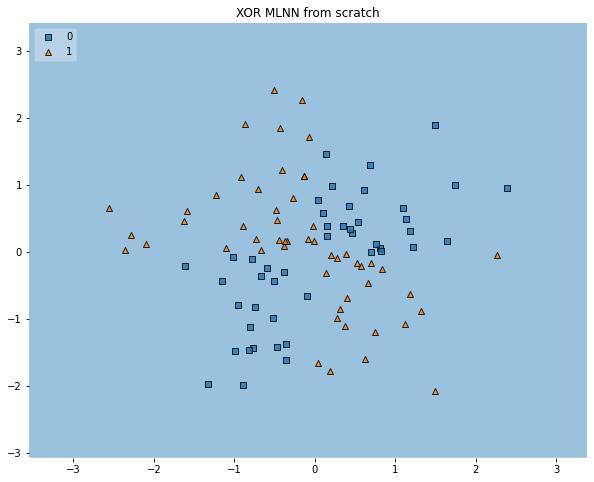

In [57]:
# visualization

fig = plt.figure(figsize=(10,8))
fig = plot_decision_regions(X=X_test, y=y_test, clf=model, legend=2)
plt.title("XOR MLNN from scratch")
plt.show()